### 💡 Additional Reading Material

For a deeper, visual intuition of how neural networks function and learn, the following guide is an excellent resource.
[**Neural Networks by 3Blue1Brown**](https://www.3blue1brown.com/lessons/neural-networks)

These other tutorials come from the Course Notebooks Repository:

> In-depth: 
[**Introduction to Tensors in PyTorch**](https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/01A_intro_to_tensors_pytorch.ipynb)

> In-depth: 
[**Introduction to Tensors in TernsorFlow**](https://github.com/CSCN8010/CSCN8010/blob/main/dl_class_notebooks/01B_intro_to_tensors_tensorflow.ipynb)  

<br/>
<br/>

***


# 🧠 Multi-Layered Perceptrons (MLPs)

---

## 🔍 Part 1: What is a Perceptron?

- A perceptron is the simplest kind of neural network: a single neuron with:
  - Inputs: $x_1, x_2, ..., x_n$
  - Weights: $w_1, w_2, ..., w_n$
  - Bias: $b$
  - Activation: $\hat{y} = \text{activation}(\sum x_i w_i + b)$

$$
\hat{y} = \text{activation}(x \cdot w + b)
$$


In [ ]:
# Import the neural network module from PyTorch, which contains the building 
# blocks for models, such as layers and activation functions
import torch
import torch.nn as nn

# Single Perceptron with 2 inputs
# Define a simple neural network model using PyTorch's Sequential API
# This model consists of a single linear layer followed by a sigmoid activation function
model = nn.Sequential(

    # Linear layer with 2 input features and 1 output feature
    # It performs a linear transformation on the input data.
    # Internally, this layer contains two weights (one for each input) and one bias, which are
    # initialized with random values by PyTorch when the model is created
    nn.Linear(2, 1),

    # This is the second layer, an activation function. It takes the single value from the nn.Linear layer 
    # and applies the sigmoid formula to it, squashing the result to a value between 0 and 1.
    nn.Sigmoid()
)

# Sample input
# Create a tensor with two features (inputs) to pass through the model
# This tensor represents a single data point with two features, which is the expected input shape for
# the model defined above
x = torch.tensor([[1.0, 2.0]])

# This performs the "feedforward" pass, where the input x is sent through the linear layer and then 
# the sigmoid layer to produce the final output.
output = model(x)

# This extracts the single numerical value from the output tensor and prints it as a standard Python number.
print("Output:", output.item())


Output: 0.5028297305107117


### Mathematical Explanation for the output (assuming = 0.5028297305107117)

The calculation happens in two steps, corresponding to the two layers in `nn.Sequential`.

#### Step 1: The Linear Layer
The `nn.Linear` layer calculates the weighted sum of the inputs plus a bias. The general formula is:

$$z = (x_1 \cdot w_1) + (x_2 \cdot w_2) + b$$

Where:
* $x_1, x_2$ are the inputs (`1.0` and `2.0`).
* $w_1, w_2$ are the weights for each input, initialized randomly by PyTorch.
* $b$ is the bias, also initialized randomly.

#### Step 2: The Sigmoid Activation Layer
The result of the linear layer, $z$, is then passed to the sigmoid function, which calculates the final output:

$$\text{Output} = \sigma(z) = \frac{1}{1 + e^{-z}}$$

#### Reproducing Your Specific Output
Since the weights ($w_1, w_2$) and bias ($b$) are initialized randomly, the output will be different each time the script is run. To get your **exact output** of `0.50282973`, the randomly generated weights and bias must have produced an intermediate value $z$ that satisfies the sigmoid equation.

We can work backward from your output to find what $z$ must have been:

1.  **Inverse Sigmoid**: The inverse of the sigmoid function is the logit function.
    $$z = \sigma^{-1}(\text{Output}) = \ln\left(\frac{\text{Output}}{1 - \text{Output}}\right)$$
2.  **Calculation**:
    $$z = \ln\left(\frac{0.50282973}{1 - 0.50282973}\right) = \ln(1.01138) \approx 0.011318$$

So, the linear layer's random weights and bias must have resulted in this equation:
$$(1.0 \cdot w_1) + (2.0 \cdot w_2) + b = 0.011318$$

For example, a plausible set of random values PyTorch might have generated to get this result is $w_1=0.35$, $w_2=-0.2$, and $b=0.061318$.

* **Linear Calculation**: $z = (1.0 \cdot 0.35) + (2.0 \cdot -0.2) + 0.061318 = 0.35 - 0.40 + 0.061318 = \mathbf{0.011318}$
* **Sigmoid Calculation**: $\text{Output} = \frac{1}{1 + e^{-0.011318}} \approx \mathbf{0.50282973}$

---

## 🧠 Part 2: What is an MLP?

- MLP = Multi-Layer Perceptron = Neural Network with:
  - Input layer
  - One or more Hidden Layers
  - Output Layer
- Each layer contains **neurons**, each performing:
  - Weighted sum
  - Activation function

🧩 Why Use MLPs?
- MLPs can learn **non-linear** boundaries
- The more hidden layers, the **deeper** the network (but beware of overfitting)


In [3]:
# This code uses the Keras library from TensorFlow to build, define, and compile a simple two-layer neural network 
# designed for a binary classification task.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# This initializes an empty model to which layers will be added.
model = Sequential()

# This adds a dense (fully connected) layer with 8 neurons, using the ReLU activation function.
# The input dimension is set to 2, meaning the model expects input data with two features.
# Dense: This is a standard, fully-connected neural network layer.
# 8: Specifies that this layer has 8 neurons (or units)
# input_dim=2: This indicates that the input to this layer will have 2 features.
# activation='relu': This specifies that the ReLU (Rectified Linear Unit) activation function
model.add(Dense(8, input_dim=2, activation='relu'))  # hidden layer

# This adds the second and final layer, which is the output layer.
# 1: This layer has a single neuron
# activation='sigmoid': This specifies that the sigmoid activation function will be used, 
# which is common for binary classification tasks.
model.add(Dense(1, activation='sigmoid'))            # output layer

#  configures the model's learning process before training begins.
# optimizer='adam': This sets the optimizer, the algorithm used to update the network's weights 
# based on the training data. Adam is a popular and effective general-purpose optimizer.
# loss='binary_crossentropy': This sets the loss function, which measures the error between 
# the model's predictions and the true labels. binary_crossentropy is the standard loss function 
# for binary classification tasks.
# metrics=['accuracy']: This specifies the metric to be monitored during training. accuracy will 
# calculate the percentage of predictions that were correct.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# prints a concise summary of the network, including:
# The layers and their order.
# The output shape of each layer.
# The number of trainable parameters (weights and biases) in each layer and in total.
model.summary()


c:\StudentWork\Code\CSCN8010\MultiLayerPerceptrons\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

This output provides a layer-by-layer summary of the model's architecture and the number of parameters it contains. Here's a breakdown of what each part means.

***
### Output Shape
The output shape column shows the dimensionality of the data after it passes through a layer.

* **`(None, 8)`**: For the first `Dense` layer.
    * The **`None`** is a placeholder for the **batch size**. It means the model can accept a variable number of input samples (e.g., 16, 32, 64) at a time.
    * The **`8`** means that for each input sample, this layer produces an output vector of size 8, corresponding to the **8 neurons** in the layer.
* **`(None, 1)`**: For the second `Dense` layer.
    * The **`None`** is again the batch size.
    * The **`1`** means the layer outputs a single value for each input sample, corresponding to the **1 neuron** in the output layer.

***
### Parameter Calculation (Param #)
Parameters are the internal variables of the model that are learned during training; they consist of **weights** and **biases**. The formula for a `Dense` layer is:

$$\text{Parameters} = (\text{input\_features} \times \text{neurons}) + \text{neurons}$$

* **`dense_2` (24 params)**:
    * This layer takes an input with **2 features** (`input_dim=2`) and has **8 neurons**.
    * **Weights**: $2 \text{ inputs} \times 8 \text{ neurons} = 16 \text{ weights}$
    * **Biases**: Each of the 8 neurons has 1 bias term, so there are $8 \text{ biases}$.
    * **Total**: $16 + 8 = 24$ parameters.

* **`dense_3` (9 params)**:
    * This layer's input is the output of the previous layer, which had **8 neurons**, so it takes **8 features**. This layer has **1 neuron**.
    * **Weights**: $8 \text{ inputs} \times 1 \text{ neuron} = 8 \text{ weights}$
    * **Biases**: The single neuron has 1 bias term, so there is $1 \text{ bias}$.
    * **Total**: $8 + 1 = 9$ parameters.

***
### Total, Trainable & Non-trainable Params

* **Total params (33)**: This is the sum of the parameters from all layers in the model.
    $$24 \text{ (from dense\_2)} + 9 \text{ (from dense\_3)} = 33$$
* **Trainable params (33)**: These are the parameters that the optimizer will adjust during training to minimize the loss function. By default, all parameters in a `Dense` layer are trainable.
* **Non-trainable params (0)**: These are parameters that are "frozen" and are not updated during training. This is often used in more advanced techniques like transfer learning. Since all layers in this model are set to be trainable by default, this count is 0.

---

## 🧠 Part 3: Activation Functions Explained

| Function | Formula | Range | Use Case |
|----------|---------|-------|----------|
| **Sigmoid** | $\sigma(x) = \frac{1}{1+e^{-x}}$ | (0, 1) | Binary classification |
| **ReLU** | $f(x) = \max(0, x)$ | [0, ∞) | Most common hidden layer |
| **Tanh** | $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$ | (−1, 1) | When negative outputs help |

🧠 Tip: Use **ReLU** in hidden layers and **Sigmoid/Softmax** in output.


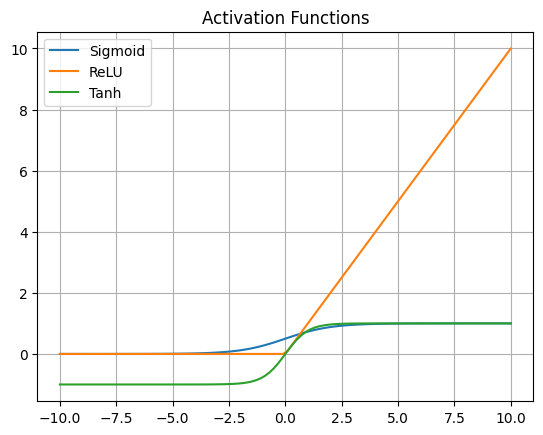

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
tanh = np.tanh(x)

plt.plot(x, sigmoid, label='Sigmoid')
plt.plot(x, relu, label='ReLU')
plt.plot(x, tanh, label='Tanh')
plt.legend(); plt.title("Activation Functions"); plt.grid(True)
plt.show()


---

## 🧠 Part 4: How Feedforward Works

1. Start with input vector $X$
2. Compute weighted sum: $z = XW + b$
3. Apply activation function to get output: $a = f(z)$
4. Pass output to next layer (if any)
5. Final output is prediction


---

## 🧠 Part 5: Backpropagation in Detail

1. **Forward pass**: Compute prediction $\hat{y}$
2. **Compute error**: $\text{loss} = y - \hat{y}$
3. **Backpropagate error**: Chain rule to compute gradient
4. **Update weights**:

$$
w \leftarrow w - \eta \cdot \frac{\partial \text{loss}}{\partial w}
$$

⚠️ Too high: overshooting  
⚠️ Too low: slow convergence


The code below implements the complete training process for a simple Multi-Layered Perceptron (MLP) using the backpropagation algorithm using PyTorch.

The two key imports are:

`from torch.optim import SGD` imports the **Stochastic Gradient Descent (SGD)** optimizer from PyTorch's optimization module, `torch.optim`. 
> We will explore it in more detail after the code run below.

`torch.nn.functional` is a PyTorch module that provides a wide range of functions used for building neural network models, such as activation functions, loss functions, and other operations like pooling and normalization.

Typically imported with the alias `F`, these are **stateless** functions, meaning they don't hold any learnable parameters like weights or biases.

-----

#### Key Distinction: Layers vs. Functions

The primary difference in PyTorch is between stateful layers (`torch.nn.Module`) and stateless functions (`torch.nn.functional`).

  * **`torch.nn` (Module-based layers)**: These are Python classes that hold **state**, most importantly, the **learnable parameters** (weights and biases). You define them in your model's `__init__` method.

      * **Examples**: `nn.Linear`, `nn.Conv2d`, `nn.BatchNorm2d`.

  * **`torch.nn.functional` (Functional API)**: These are simple functions that perform operations but have no learnable parameters of their own. You typically call them directly inside the `forward` method.

      * **Examples**: `F.relu`, `F.sigmoid`, `F.max_pool2d`, `F.binary_cross_entropy`.

#### When to Use Which

The choice often comes down to whether the operation needs to store parameters.

  * **Use `nn.Module` layers** for any operation with learnable weights, like linear transformations, convolutions, or batch normalization.
  * **Use `nn.functional`** for operations that don't have learnable weights, like activation functions (ReLU, sigmoid), pooling, or dropout. This is often a stylistic choice, as PyTorch also provides module-based versions (e.g., `nn.ReLU()`).


In [ ]:
# This code defines a simple Multi-Layered Perceptron (MLP) using PyTorch,
# which consists of two fully connected layers with a ReLU activation function in between.

import torch.nn.functional as F
from torch.optim import SGD

class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()

        # Define the first fully connected layer with 2 input features and 8 output features
        self.fc1 = nn.Linear(2, 8)
        # Define the second fully connected layer with 8 input features and 1 output feature
        self.fc2 = nn.Linear(8, 1)

    # The forward method defines the forward pass of the network
    # It takes an input tensor x, applies the first layer followed by ReLU activation,
    def forward(self, x):
        x = F.relu(self.fc1(x))
        # Then applies the second layer followed by a sigmoid activation function
        # The sigmoid function squashes the output to a range between 0 and 1,
        return torch.sigmoid(self.fc2(x))

# Dummy dataset (XOR-like)
X = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y = torch.tensor([[0.],[1.],[1.],[0.]])

model = SimpleMLP()
optimizer = SGD(model.parameters(), lr=0.1)

# Training loop
for epoch in range(2000):
    y_pred = model(X)
    loss = F.binary_cross_entropy(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print("Trained Output:\n", model(X).detach())


Trained Output:
 tensor([[0.0297],
        [0.9958],
        [0.9958],
        [0.0027]])


This output shows your model's final predictions for each of the four data points in your input tensor `X` after the training process is complete. Since the model's final layer is a `sigmoid` function, each output value is a probability between 0 and 1.

The model has successfully learned the non-linear XOR pattern from the data.

---
#### Output Breakdown

Here's a comparison of the model's predictions to the target labels (`y`):

* **Input `[0,0]`** → **Prediction ($\hat{y}$) = `0.0297`**
    * The target ($y$) was `0`. The model's output is very close to 0, indicating a correct prediction.

* **Input `[0,1]`** → **Prediction ($\hat{y}$) = `0.9958`**
    * The target ($y$) was `1`. The model's output is very close to 1, indicating a correct prediction.

* **Input `[1,0]`** → **Prediction ($\hat{y}$) = `0.9958`**
    * The target ($y$) was `1`. The model's output is also very close to 1, a correct prediction.

* **Input `[1,1]`** → **Prediction ($\hat{y}$) = `0.0027`**
    * The target ($y$) was `0`. The model's output is very close to 0, indicating another correct prediction.

In essence, the 2,000 training loops successfully adjusted the model's weights and biases so that it can now accurately distinguish between the different input patterns and produce the correct output.

#### What is an Optimizer?

In neural networks, an **optimizer** is an algorithm that adjusts the model's internal parameters (its weights and biases) to minimize the error, or **loss**. It's the engine that drives the learning process.

#### What is SGD?

**Stochastic Gradient Descent** is one of the most fundamental optimization algorithms. Here’s what the name means:

  * **Gradient Descent**: Imagine the model's loss as a hilly landscape. The goal is to find the lowest point (minimum loss). Gradient descent does this by calculating the slope (gradient) at the model's current position and taking a step downhill. It repeats this process until it settles at the bottom of a valley. ⛰️
  * **Stochastic**: Instead of using the entire dataset to calculate the slope for each step (which would be very slow), SGD uses a small, random subset of the data called a **mini-batch**. This makes the training process much faster and can help the model avoid getting stuck in poor solutions.

#### How It's Used in Code

You first instantiate the `SGD` optimizer, telling it which model parameters to update and setting the **learning rate (`lr`)**, which controls the size of each "step" it takes.

```python
# SGD needs the model's parameters to know what to update
# 'lr' is the learning rate, a critical hyperparameter
optimizer = SGD(model.parameters(), lr=0.01)

# Inside the training loop...
# After calculating gradients with loss.backward()...
optimizer.step() # This line updates the model's weights and biases
```

In short, `from torch.optim import SGD` gives you a powerful tool to actually train your neural network.

---

## 🧠 Part 6: Hyperparameters in MLPs

| Hyperparameter | Description |
|----------------|-------------|
| Learning Rate  | Step size for weight update |
| Epochs         | Full dataset passes |
| Batch Size     | Subset used per gradient update |
| Optimizer      | Algorithm to minimize error (e.g., SGD, Adam) |
| Loss Function  | Measures how far prediction is from truth |


In [6]:
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = StandardScaler().fit_transform(X_train)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4572 - loss: 0.7586   
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4973 - loss: 0.6941 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7050 - loss: 0.6284 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step - accuracy: 0.8382 - loss: 0.5710
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.8631 - loss: 0.5081
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.8756 - loss: 0.4492
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8669 - loss: 0.4151 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8634 - loss: 0.3900 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8743 - loss: 0.3494 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8741 - loss: 0.3415 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8636 - loss: 0.3318 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accur

Here is a detailed explanation of Learning Rate and Batch Size, two of the most important hyperparameters you'll tune before training a neural network.

---
#### 1. Learning Rate
The **learning rate**, often denoted as `lr` in code, is a hyperparameter that controls how much the model's weights are adjusted with respect to the loss gradient during training. Think of it as the **size of the steps** the optimizer takes to reach the lowest point in the loss landscape.

* **How it Works**: The learning rate is a small positive number (e.g., `0.1`, `0.01`, `0.001`) that scales the gradient before it's used to update the weights. The update rule is conceptually:
    $$\text{new\_weight} = \text{old\_weight} - (\text{learning\_rate} \times \text{gradient})$$

* **Impact of the Learning Rate**:
    * **A high learning rate** causes the model to take large steps. This can speed up learning, but it risks **overshooting** the lowest point of the loss function. The model might fail to converge, with the loss bouncing around erratically or even increasing.
    * **A low learning rate** causes the model to take tiny, careful steps. While this is more likely to lead to a good solution, it can make training extremely slow. It also runs the risk of getting stuck in a suboptimal "local minimum."

Finding the right learning rate is critical for efficient training and is often one of the first hyperparameters to tune.

---
#### 2. Batch Size
The **batch size** defines the number of training samples to work through before the model’s internal parameters are updated. In other words, it's how many examples the model sees before it performs a backpropagation step.

* **How it Works**: Instead of calculating the error gradient from the entire dataset at once, the data is broken into smaller "mini-batches." The model performs a forward pass, a backward pass, and a weight update for each mini-batch.

* **Impact of the Batch Size**:
    * **A small batch size** (e.g., 1, which is true Stochastic Gradient Descent) provides a "noisier" but faster estimate of the gradient. The training process can be unstable, with the loss fluctuating a lot, but the randomness can sometimes help the model find better solutions.
    * **A large batch size** provides a more accurate and stable gradient estimate, leading to a smoother convergence. However, it requires more memory and computational power per step.
    * **A full batch size** (where the batch includes the entire dataset, known as Batch Gradient Descent) is very computationally expensive and is rarely used in modern deep learning.

The most common approach is **mini-batch gradient descent**, which uses a batch size between 1 and the full dataset size (typically powers of 2, like 32, 64, or 128), offering a balance between computational efficiency and training stability.

The **loss** and **accuracy** values in your output are key indicators of how well your model is learning during the training process. They are calculated for each epoch based on the functions you specified in `model.compile()`.

---
#### 3. Accuracy

**Accuracy** is a more intuitive metric that measures the fraction of predictions your model got right.

* **How it works**: For each data point, the model's output (a probability) is converted into a definite class prediction. The standard threshold is 0.5.
    * If the predicted probability is > 0.5, the model predicts class `1`.
    * If the predicted probability is ≤ 0.5, the model predicts class `0`.
    * This final prediction is then compared to the true label.

* **The Formula**: Accuracy is calculated simply as:
    $$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Samples}}$$

The `accuracy` value you see (`0.4572` or 45.7%, `0.4973` or 49.7%, etc.) shows the percentage of the training samples the model classified correctly in that epoch. You can see this value increasing over time, which shows the model is learning.

---
#### 4. Loss Calculation (Cross Entropy)

The **loss** (or error) is a measure of how wrong the model's predictions are compared to the true labels. The optimizer's job is to minimize this value.

* **How it works**: You used `'binary_crossentropy'`, which is the standard loss function for two-class (binary) classification problems. It works by heavily penalizing the model when it makes a confident but incorrect prediction.
    * If the true label is `1` and the model predicts a low probability like `0.05`, the loss will be very high.
    * If the true label is `1` and the model predicts a high probability like `0.95`, the loss will be very low.

* **The Formula**: For a single data point, the binary cross-entropy loss is calculated as:
    $$L = -[y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y})]$$
    * $y$ is the true label (0 or 1).
    * $\hat{y}$ is the model's predicted probability (a value between 0 and 1 from the sigmoid function).

The `loss` value you see in the output (`0.7586`, `0.6941`, etc.) is the **average loss** across all samples processed in that epoch. **The goal of training is to make this number as small as possible**.


